In [2]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from scipy.stats import *
from sklearn import preprocessing 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
df=pd.read_csv('regLin.csv')
df.head()

,X,y
0,35.657897,28.074403
1,48.685931,36.674434
2,95.861773,67.903577
3,25.997253,11.931727
4,49.964772,30.286144


In [32]:
X_train,X_test,y_train,y_test=train_test_split(df[['X']],df[['y']],test_size=.2,random_state=18) 

In [11]:
y_train=y_train.as_matrix() 
y_test=y_test.as_matrix()
X_train=X_train.as_matrix() 
X_test=X_test.as_matrix()

In [12]:
X_train2=X_train/max(y_train)
y_train2=y_train/max(X_train)
X_test2=X_test/max(y_test)
y_test2=y_test/max(X_test)

**Vamos a hacer la columna de 1's para w0**

In [399]:
ones=np.ones(len(X_train2))

**hacemos la matriz de [X0 X1]**

In [29]:
def agregar_unos(m):
    unos = np.array([np.ones(m.shape[0])])
    return np.concatenate((unos.T,m),axis=1)

In [401]:
mat=agregar_unos(X_train2) 
mat

array([[ 1.        ,  1.04931258],
       [ 1.        ,  0.59813497],
       [ 1.        ,  0.88931977],
       ..., 
       [ 1.        ,  0.45115804],
       [ 1.        ,  0.94039284],
       [ 1.        ,  0.55699797]])

In [310]:
#y_train2=y_train

In [311]:
max(X_train)

array([ 99.9595795])

In [513]:
def LMS(eta):
    """
    Función de eta
    """
    
    w = np.array([1.,1.])

    error = []
    W_0 = []
    W_1 = []

    contador = 0

    while (sum([np.dot(w,mat[i,:]) - y_train2[i] for i in range(len(y_train2))]))**2 > 0.01:
        error.append((sum([np.dot(w,mat[i,:]) - y_train2[i] for i in range(len(y_train2))]))**2)
        W_0.append(w[0])
        W_1.append(w[1])
        w[0] = w[0] + (eta * (sum([(y_train2[i] - np.dot(w,mat[i,:])) * mat[i,0] for i in range(len(y_train2))])/len(y_train2)))
        w[1] = w[1] + (eta * (sum([(y_train2[i] - np.dot(w,mat[i,:])) * mat[i,1] for i in range(len(y_train2))])/len(y_train2)))
        contador += 1
        
    return error, w, W_0, W_1, contador

In [514]:
%%time 
error, w, W_0, W_1, contador=LMS(0.05)

CPU times: user 8.12 s, sys: 292 ms, total: 8.41 s
Wall time: 8.11 s


In [515]:
w

array([ 0.02529858,  0.43647749])

In [282]:
w[0]*max(X_train)

array([ 2.52883502])

In [283]:
w[1]*max(X_train2)

array([ 0.60797708])

In [300]:
def graficos(eta):
    error, w, W_0, W_1, contador=LMS(eta)
    plt.scatter(X_train2,y_train2) 
    plt.plot(X_train2,w[0]+w[1]*X_train2,color='red')
    plt.title('ajuste entrenamiento')
    plt.show()
    
    plt.scatter(X_test2,y_test2) 
    plt.plot(X_test2,w[0]+w[1]*X_test2,color='red')
    plt.title('ajuste Test')
    plt.show()
    
    plt.scatter(W_0,error)
    plt.title('W0 vs. errores')
    plt.show()
    
    plt.scatter(W_1,error)
    plt.title('W1 vs. errores')
    plt.show()
    
    

 # $\eta=0.5$

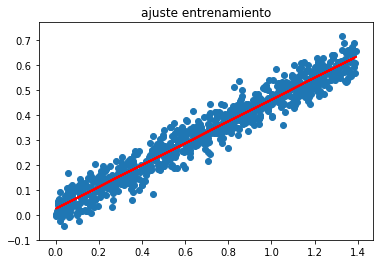

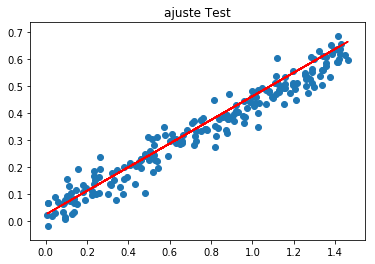

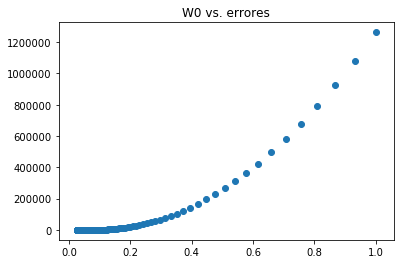

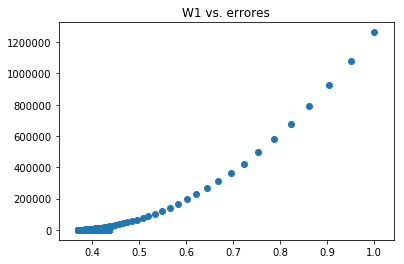

In [301]:
graficos(0.05)

# Version 2

In [38]:
X_train,X_test,y_train,y_test=train_test_split(df[['X']],df[['y']],test_size=.2,random_state=18) 
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [39]:
y_train2=np.array(y_train/np.max(X_train))[:,0]
X_train2=np.array(X_train/np.max(y_train))
y_test2=np.array(y_test/np.max(X_test))[:,0]
X_test2=np.array(X_test/np.max(y_test))

**Hacemos funcion que agregue 1s para hacer productos matriciales** 

In [ ]:
def agregar_unos(m):
    unos = np.array([np.ones(m.shape[0])])
    return np.concatenate((unos.T,m),axis=1)

In [51]:
def wreg(x,y,eta):
    w=np.ones(len(np.transpose(x))+1)
    error=np.array([]) 
    w0=np.array([]) 
    w1=np.array([])
    while (np.sum((y - np.dot(w,agregar_unos(x).T))))**2 > 0.01:
        error=np.append(error,(np.sum((y - np.dot(w,agregar_unos(x).T))))**2) 
        w0=np.append(w0,w[0]) 
        w1=np.append(w1,w[1])
        #print(w[0],w[1])
        res=y-np.dot(w,agregar_unos(x).T) 
        w[0]= w[0] + (eta * np.sum(res * agregar_unos(x)[:,0])/len(y))  
        w[1] = w[1] + (eta*np.sum((y - np.dot(w,agregar_unos(x).T)) * agregar_unos(x)[:,1])/len(y))
    return w,error,w0,w1

w,error,w0,w1=wreg(X_train2,y_train2,0.05) 

In [54]:
def graficos(eta):
    w,error,W_0,W_1=wreg(X_train2,y_train2,eta)
    plt.scatter(X_train2,y_train2) 
    plt.plot(X_train2,w[0]+w[1]*X_train2,color='red')
    plt.title('ajuste entrenamiento')
    plt.show()
    
    plt.scatter(X_test2,y_test2) 
    plt.plot(X_test2,w[0]+w[1]*X_test2,color='red')
    plt.title('ajuste Test')
    plt.show()
    
    plt.scatter(W_0,error)
    plt.title('W0 vs. errores')
    plt.show()
    
    plt.scatter(W_1,error)
    plt.title('W1 vs. errores')
    plt.show()

# Para  $\eta=0.05$

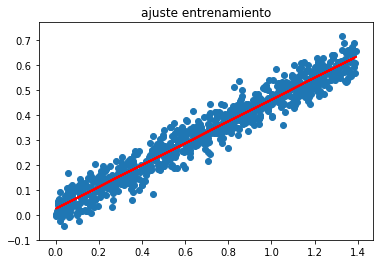

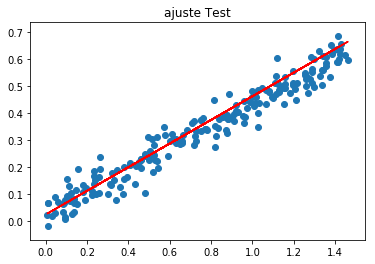

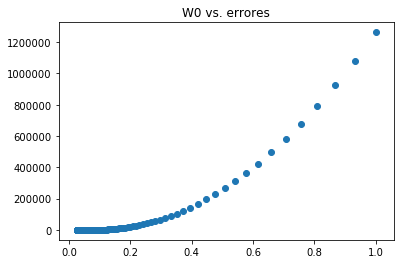

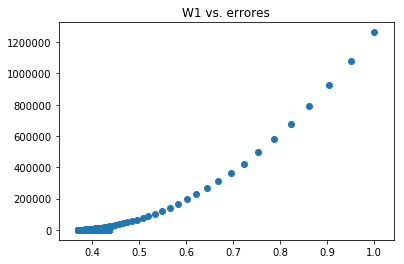

In [55]:
graficos(0.05)

# Para  $\eta=0.1$

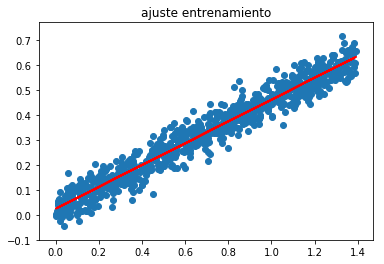

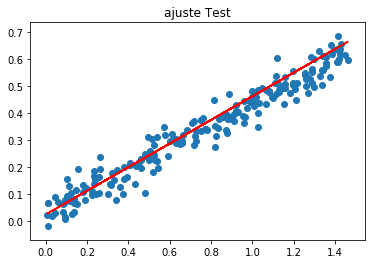

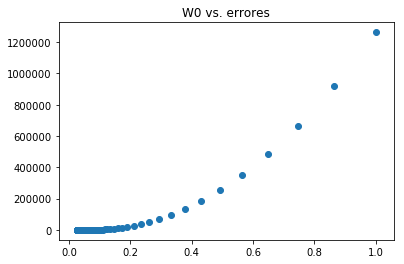

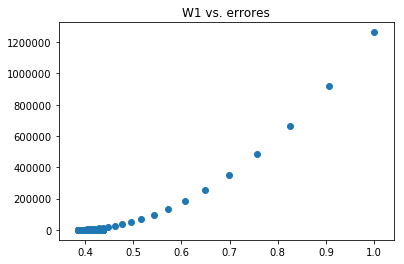

In [57]:
graficos(0.1)

# Para $\eta=1$

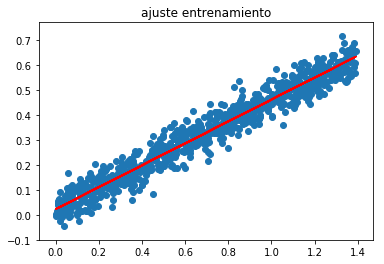

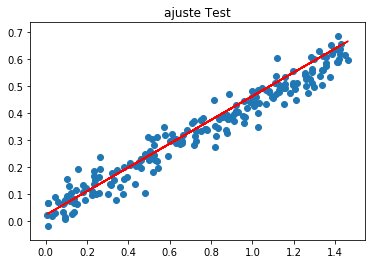

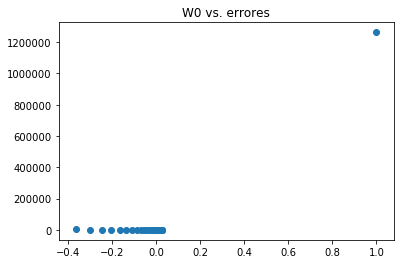

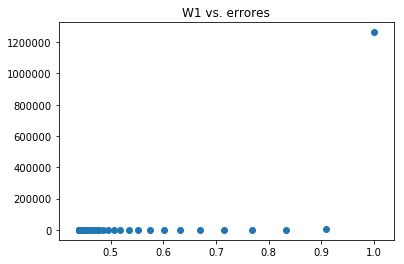

In [58]:
graficos(1)

In [64]:
w,error,w0,w1=wreg(X_train2,y_train2,.05)

In [65]:
w

array([ 0.02529858,  0.43647749])